# 02 - Sentiment Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from collections import Counter, defaultdict
import re
# import sklearn models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import LabelPowerset
# nlp libraries/api
from spacy import displacy
from gensim import models
import pickle
import warnings
warnings.filterwarnings('ignore')
import en_core_web_lg
from spacy import displacy
import spacy
nlp = en_core_web_lg.load()
'done'

'done'

In [ ]:
# Setup nltk corpora path and Google Word2Vec location
# google_vec_file = '../data/opinion-lexicon-English/GoogleNews-vectors-negative300.bin'
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)
# pickle.dump(word2vec, open("word2vec_google.pkl", 'wb'))
# print('done')
# If above script has been run, load saved word embedding
# word2vec = pickle.load(open("word2vec_google.pkl", 'rb'))
google_vec_file = 'GoogleNews-vectors-negative300.bin'
model = models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

print('done')

In [ ]:
import os
# import tensorflow as tf
print(os.listdir())
# Load opinion lexicon
neg_file = open("neg_words.txt",encoding = "ISO-8859-1")
pos_file = open("positive-words.txt",encoding = "ISO-8859-1")
neg = [line.strip() for line in neg_file.readlines()]
pos = [line.strip() for line in pos_file.readlines()]
opinion_words = neg + pos
mlb = pickle.load(open("mlb.pkl", 'rb'))
naive_model1 = pickle.load(open("naive_model1.pkl", 'rb'))
# lstm_model1 = tf.keras.models.load_model('lstm_model_reviews_300d.h5')
print('done')

In [ ]:

mlb.classes

In [ ]:
 
model.n_similarity(['food'], ["burger"])

In [ ]:
from nltk.corpus import stopwords,wordnet as wn
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import json
import io
from keras_preprocessing.text import tokenizer_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [6]:
# nltk.download('wordnet')
def text_process(text):
    
    text = text.translate(string.punctuation)

    text = text.lower().split()

    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    lemmatizer = WordNetLemmatizer()
    stemmed_words = [lemmatizer.lemmatize(word,pos='v') for word in text]
    text = " ".join(stemmed_words)

    return text


In [43]:
def check_similarity(aspects, word):
    similarity = []
    for aspect in aspects:
        similarity.append(model.n_similarity([aspect], [word]))
    # set threshold for max value
    if max(similarity) > 0.30:
        return aspects[np.argmax(similarity)]
    else:
        return None
def assign_term_to_aspect(aspect_sent, terms_dict, sent_dict, pred):
    aspects = ['ambience', 'food', 'price', 'service']
    for term in sent_dict:
        try:
            if check_similarity(aspects, term.split()[-1]):
                terms_dict[check_similarity(aspects, term.split()[-1])][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent[check_similarity(aspects, term.split()[-1])]["pos"] += sent_dict[term]
                else:
                    aspect_sent[check_similarity(aspects, term.split()[-1])]["neg"] += abs(sent_dict[term])
            elif (pred[0] == "anecdotes/miscellaneous"):
                continue
            elif (len(pred) == 1):
                terms_dict[pred[0]][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent[pred[0]]["pos"] += sent_dict[term]
                else:
                    aspect_sent[pred[0]]["neg"] += abs(sent_dict[term])
            else:
                terms_dict["misc"][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent["misc"]["pos"] += sent_dict[term]
                else:
                    aspect_sent["misc"]["neg"] += abs(sent_dict[term])
        except:
            print(term, "not in vocab")
            continue
    return aspect_sent, terms_dict






def feature_sentiment(sentence):
    sent_dict = Counter()
    sentence = nlp(sentence)
    debug = 0
    for token in sentence:
        if token.text in opinion_words:
            sentiment = 1 if token.text in pos else -1
            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] += sentiment
            else:
                for child in token.children:
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):
                        sent_dict[child.text] += sentiment
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj = 1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] += sentiment
                for child in token.head.children:
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    if (child.dep_ == "neg"):
                        sentiment *= -1
                for child in token.head.children:
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        sent_dict[noun] += sentiment
                    debug += 1
    return sent_dict


def classify_and_sent(sentence, aspect_sent, terms_dict):
    sentence=clean_contractions(sentence,contraction_mapping)
    sentence=text_process(sentence)
    with open('tokenizer.json') as f:
        data = json.load(f)
        tokenizer = tokenizer_from_json(data)
    testing_sequences = tokenizer.texts_to_sequences([sentence])
    testing_padded = pad_sequences(testing_sequences,maxlen=100)
    prediction = lstm_model1.predict([testing_padded])
    for i in range(len(prediction)):
        for j in range(len(prediction[i])):
            if prediction[i][j]>=0.5:
                prediction[i][j]=1
            else:
                prediction[i][j]=0


            
    pred = mlb.inverse_transform(prediction)
    print('pred ',pred)
    sent_dict = feature_sentiment(sentence)
    print(sent_dict)
    aspect_sent, terms_dict = assign_term_to_aspect(aspect_sent, terms_dict, sent_dict, pred[0])
    return aspect_sent, terms_dict
def split_sentence(text):
    review = nlp(text)
    bag_sentence = []
    start = 0
    for token in review:
        if token.sent_start:
            bag_sentence.append(review[start:(token.i-1)])
            start = token.i
        if token.i == len(review)-1:
            bag_sentence.append(review[start:(token.i+1)])
    return bag_sentence
def remove_special_char(sentence):
    return re.sub(r"[^a-zA-Z0-9.',:;?]+", ' ', sentence)
def review_pipe(review, aspect_sent, terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}):
    sentences = split_sentence(review)
    for sentence in sentences:
        sentence = remove_special_char(str(sentence))
        aspect_sent, terms_dict = classify_and_sent(sentence.lower(), aspect_sent, terms_dict)
    return aspect_sent, terms_dict


In [19]:
def check_similarity(aspects, word):

    similarity = []
    for aspect in aspects:
        similarity.append(model.n_similarity([aspect], [word]))
    # set threshold for max value
    if max(similarity) > 0.30:
        return aspects[np.argmax(similarity)]
    else:
        return None


def assign_term_to_aspect(aspect_sent, terms_dict, sent_dict, pred):

    aspects = ['ambience', 'food', 'price', 'service']

    for term in sent_dict:
        try:
            if check_similarity(aspects, term.split()[-1]):
                terms_dict[check_similarity(aspects, term.split()[-1])][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent[check_similarity(aspects, term.split()[-1])]["pos"] += sent_dict[term]
                else:
                    aspect_sent[check_similarity(aspects, term.split()[-1])]["neg"] += abs(sent_dict[term])
            elif (pred[0] == "anecdotes/miscellaneous"):
                continue
            elif (len(pred) == 1):
                terms_dict[pred[0]][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent[pred[0]]["pos"] += sent_dict[term]
                else:
                    aspect_sent[pred[0]]["neg"] += abs(sent_dict[term])
            else:
                terms_dict["misc"][term] += sent_dict[term]
                if sent_dict[term] > 0:
                    aspect_sent["misc"]["pos"] += sent_dict[term]
                else:
                    aspect_sent["misc"]["neg"] += abs(sent_dict[term])
        except:
            print(term, "not in vocab")
            continue
    return aspect_sent, terms_dict


def feature_sentiment(sentence):

    sent_dict = Counter()
    sentence = nlp(sentence)
    debug = 0
    for token in sentence:

        if token.text in opinion_words:
            sentiment = 1 if token.text in pos else -1

            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] += sentiment
            else:
                for child in token.children:
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):
                        sent_dict[child.text] += sentiment
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj = 1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] += sentiment

                for child in token.head.children:
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    if (child.dep_ == "neg"):
                        sentiment *= -1

                for child in token.head.children:
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        sent_dict[noun] += sentiment
                    debug += 1
    return sent_dict


def classify_and_sent(sentence, aspect_sent, terms_dict):

    predicted = naive_model1.predict([sentence])
#     print('predicted model',predicted)
    pred = mlb.inverse_transform(predicted)
#     print(pred)
    sent_dict = feature_sentiment(sentence)
#     print(sent_dict)
    aspect_sent, terms_dict = assign_term_to_aspect(aspect_sent, terms_dict, sent_dict, pred)
    return aspect_sent, terms_dict









def split_sentence(text):

    review = nlp(text)
    bag_sentence = []
    start = 0
    for token in review:
        if token.sent_start:
            bag_sentence.append(review[start:(token.i-1)])
            start = token.i
        if token.i == len(review)-1:
            bag_sentence.append(review[start:(token.i+1)])
    return bag_sentence


def remove_special_char(sentence):
    return re.sub(r"[^a-zA-Z0-9.',:;?]+", ' ', sentence)

def review_pipe(review, aspect_sent, terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}):
    sentences = split_sentence(review)
    for sentence in sentences:
        sentence = remove_special_char(str(sentence))
        aspect_sent, terms_dict = classify_and_sent(sentence.lower(), aspect_sent, terms_dict)
    return aspect_sent, terms_dict


In [9]:
sentence= '''yesterday I visited this place, I found pizza very yummy and the burger was so amazing that we all eatead
and ordered more, the ice cream was also so tasty but it was over priced and the music behind the ice cream bar was
so terrible'''
print(feature_sentiment(sentence))
displacy.render(nlp(sentence), style='dep',jupyter=True)

Counter({'burger': 1, 'music': -1})


In [38]:
sentence='''
yesterday I visited this place, the beef sandwiches was amazing, also the pizza was so amazing and my kids
really liked the corn soup that they ordered it twice but the music behind the icecream bar was so terrible that I
cannot talk to my friend on a call. And for this quantity of food the price is really affordable and In future
I will definitely visit the restaurant and I hope that I will get a good and quick service 
'''
terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
aspect_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
print(feature_sentiment(sentence))
print(classify_and_sent(sentence, aspect_dict,terms_dict))
displacy.render(nlp(sentence), style='dep',jupyter=True)

kids not in vocab
({'ambience': Counter({'neg': 1}), 'food': Counter({'pos': 3}), 'price': Counter({'pos': 1}), 'service': Counter({'pos': 1}), 'misc': Counter()}, {'ambience': Counter({'music': -1}), 'food': Counter({'beef sandwiches': 1, 'pizza': 1, 'soup': 1}), 'price': Counter({'price': 1}), 'service': Counter({'service': 1}), 'misc': Counter()})


## Load up dataframe and test

In [39]:
vegas = pd.read_pickle("yelp_vegas.pkl")
vegas = vegas.drop(["address","city","state",
                        "postal_code","latitude","longitude"],1)
Bellagio = vegas[vegas.name=='The Buffet at Bellagio']
Bellagio

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_vegas.pkl'

In [20]:
yardbird = vegas[vegas.name=='Yardbird Southern Table & Bar']
yardbird

,business_id,categories,is_open,name,review_count,stars,review_id,date,text
8844,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,w1I8U4cJ4QGaXA98ImNrbA,2018-08-04 20:22:15,"Service was amazing, Christina was extremely t..."
8845,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,b3nlrZeK2XpS4fTUxmA77A,2016-10-13 23:20:39,We chose this place to split lunch and it was ...
8846,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,FXwDKPUMBBSn19ZigLyEtQ,2018-09-28 06:16:56,Omg this place is amazing! The food was phenom...
8847,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,wvJszArfSJos2xnWMPRPQA,2016-08-03 23:43:53,I've had the pleasure of dining at the other l...
8848,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,67_CM-bYmWs8dcdg1JjVEQ,2015-12-20 21:23:42,One word: Amazing!! Real southern food - wil...
...,...,...,...,...,...,...,...,...,...
9120,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,8Pd2Sk58GVcNye-jIsj9gw,2017-12-16 20:14:57,"Simply the best!! From the hostess, down to de..."
9121,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,hGxYplVr8eONddkXcKQ4XA,2015-05-28 01:42:05,"If you have a fried chicken craving in Vegas, ..."
9122,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,k2AV2SeP-Z0ZHxuwj5oX_Q,2015-05-14 19:55:48,"Went tuesday night, had reservations. Asked me..."
9123,faPVqws-x-5k2CQKDNtHxw,"Restaurants, American (New), Southern",1,Yardbird Southern Table & Bar,3576,4.5,9m_aAaG2WmLI7v_6_neqjw,2018-03-24 02:51:25,Tried this place for the first time. We ordere...


In [46]:
terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
aspect_sent={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
# modify for each restaurant
for review in Bellagio.text:
    aspect_sent_bellagio, terms_dict_bellagio = review_pipe(review, aspect_sent, terms_dict)

NameError: name 'Bellagio' is not defined

In [11]:
import os
terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
aspect_sent={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}

directory = "restaurants"
for root,dirs,files in os.walk(directory):
    for file in files:
        df=pd.read_csv('restaurants/'+file)
        for review in df['text']:
            aspect_sent_yardbird, terms_dict_yardbird = review_pipe(review, aspect_sent, terms_dict)
        
        df_aspect=pd.DataFrame(aspect_sent_yardbird)
        df_term=pd.DataFrame(terms_dict_yardbird)
        
        df_aspect.drop(df_aspect.columns[0], axis=1)
        df_aspect['Restaurant']=file.split('.')[0]
        df_term['Restaurant']=file.split('.')[0]
        df_term.index.names = ['Terms']
        df_aspect.to_csv('terms_restaurant/aspect_'+file,index=False)
        df_term.to_csv('terms_restaurant/term_'+file)
        print(file)

        

predicted model   (0, 4)	1
[('service',)]
Counter({'restaurant': 1, 'memory': 1})
memory not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'mouth': 1})
mouth not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'flowers': 1})
flowers not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 1, 'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'attitude': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'him': 1})
him not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'buffet': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Cou

it not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'selection': 1})
selection not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service staff': 1})
service staff not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'restaurant': 1, 'food variety': 1, 'food': 1, 'service': 1, 'staff': 1})
food variety not in vocab
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'breakfast': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'juice': 1, 'selection': 1})
selection not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'station': 2, 'breakfast': 1, 'happy': 1})
station not in vocab
happy not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'services': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted

Counter({'waiters': 1})
waiters not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'mall': 1})
mall not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'que': 1, 'city': 1})
que not in vocab
city not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'you': 1})
you not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'beyond': -1})
beyond not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1, 'favour': 1})
favour not in vocab
predicted model   (0, 4)	1

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'kabab': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'place': 1, 'terrace': 1, 'level': 1, 'food': 1, 'service': 1})
place not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'t': 1, 'reservation': 1})
t not in vocab
reservatio

Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'space': 1})
space not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'douvt': 1})
douvt not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'ribs': 1})
ribs not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'hygiene atmosphere': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted mo

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'location': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'dining': 1, 'fav': 1, 'staff': 1})
fav not in vocab
staff not in vocab
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'price': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1, 'food': 1})
predicted model   (0, 3)	1
[('price',)]
Counter({'prices': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'delivery': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Cou

Counter({'chain': 1})
chain not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'dinning': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'foods': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'choice': 1})
choice not in vocab
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'portions': 1})
portions not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food quality': 1, 'air setting': 1})
air setting not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'breeze': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'options': 1})
options not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()

Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'time': 1})
time not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 1.5, 'variety': 1.5})
variety not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'dinner': 1, 'family': 1})
family not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'choice': 1})
choice not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 1, 'food': 1})
predicted model   (0, 1)	1
[('anecdotes/mi

Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'buffet lunch': 1, 'quality': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'lunch': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'mutton leg': 1.5, 'delicacy': 1, 'snapper': -1})
delicacy not in vocab
mutton leg not in vocab
snapper not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': -1})
predicted model   (0, 0)	1
[(

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1, 'lunch': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1, 'ambience': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'items': 1})
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'prices': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter({'e

Counter({'experience': -1})
experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'awesome': 1})
awesome not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'stew': 1, 'number': 1, 'meat': 1})
number not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'attraction': 1, 'types': 1})
types not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'food quality': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': -1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'quality': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'rates': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'kebob': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'sea breeze': 1, 'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'parking spots': -1})
parking spots not in voca

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'fame': 1, 'experience': 1})
fame not in vocab
experience not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'service': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'time': 1})
time not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1,

[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'roof top': 1.5, 'dine': 1})
roof top not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'q': 1})
q not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'hospitality': 1, 'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'meat': 1, 'location': 1, 'this': 1})
this not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'bbq dishes': 1, 'naans': 1})
predicted model   (0,

place not in vocab
bbq not in vocab
specialy not in vocab
bit not in vocab
predicted model   (0, 3)	1
[('price',)]
Counter({'parking': 1})
parking not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'seating': 0})
predicted model   (0, 2)	1
[('food',)]
Counter({'rooftop': 1})
rooftop not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'it': 1})
it not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'menu': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (

concern not in vocab
feedback not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'ambiance': 1, 'it': 1})
it not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'environment': 1, 'quality': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'dinner': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'kick': 1})
kick not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)

predicted model   (0, 4)	1
[('service',)]
Counter({'dishes': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'contacts': 1, 'ambience': 1})
place not in vocab
contacts not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1, 'serving': 1, 'well': 1})
well not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'theme': 1})
theme not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'location': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 1, 'servings': 1, 'presentation': 1, 'place': 1, 'desert': -1})
desert not in vocab
presentation not in vocab
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'pudding': -1})
pudding not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
C

Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'atmosphere': 2})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'spot': 1})
sp

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'nothing': 1})
nothing not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'ambiance': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'environment': 1, 'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'menu': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'drinks': -1, 'lemonade': -1})
lemonade not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 2})
place not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predi

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'tummy': 1})
tummy not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'steak': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'service': 1, 'variety': 1, 'perfection': 1})
variety not in vocab
perfection not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1

array not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food taste': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'gentry': 1})
gentry not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'drawback': -1})
drawback not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'atmosphere': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted 

Counter({'menu': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'crowd': 1})
crowd not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1, 'variety': 1})
variety not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1, 'colours': 1})
colours not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'environment': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'ambience': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
pre

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'buffets': 0})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'theirs': 1})
theirs not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'space': 1, 'venues': 1})
space not in vocab
venues not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 1, 'food': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecd

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'port': 1, 'food': -1, 'service': -1})
port not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'desserts': 1, 'drinks': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'style': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'problems': -1})
problems not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'dining': 1, 'service': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted mod

predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'steaks': 1, 'selection': 1})
selection not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'mosquito': -1})
mosquito not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'decor': 1})
predicted model   (0, 1)	1

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'carpaccios': 1})
carpaccios not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'steaks': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'localities': 1, 'lane': -1})
localities not in vocab
lane not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'singer': 1})
singer not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1, 'cuisine': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1})
place not in vocab
predicted mod

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'crowed': -1})
crowed not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': -1, 'friends': -1})
friends not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'area': 1})
area not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'option': 1, 'lights': 0})
lights not in vocab
option not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'bread': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'ambiance': 1, 'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'flow': -1})
flow n

Counter({'ambience': 2})
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'my': 1})
my not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'more': 1})
more not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'bistro': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'dishes': 1, 'which': 1, 'selection': 1})
which not in vocab
selection not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'dining': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1, 'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'setting': 1})
setting not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous'

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'creme': 1, 'choice': 1})
creme not in vocab
choice not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'service': 1.5})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'place': 1, 'weather': 1})
place not in vocab
weather not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'ambience': 1, 'food': -1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': -1})
predicted model   (0, 2

predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'setting': 1, 'pakistanees': 1, 'problem': -1.5})
setting not in vocab
pakistanees not in vocab
problem not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'gem': 1})
place not in vocab
gem not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'atmosphere': 1, 'guests': 1})
guests not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': -1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'work': 1})
work not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food'

predicted model   (0, 2)	1
[('food',)]
Counter({'meal': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'ingredients': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'liking': 1, 'fish': 1, 'deserts': 1})
liking not in vocab
deserts not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'bet': 1})
bet not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted 

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food quality': 0})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'promise': 1})
promise not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurants': 1, 'time': -1})
time not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
C

predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'services': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'improvement': 1})
improvement not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'view': 1})
view not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'environmet': 1, 'thanks': 1, 'service': 1})
environmet not in vocab
thanks not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'expereince': 2, 'environment': 1, 'food': 1, 'services': 1, 'restaurant': 1})
expereince not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',

Counter({'place': 1, 'month': 1, 'instrumental': 1})
place not in vocab
month not in vocab
instrumental not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'setup': 1, 'view': 1})
setup not in vocab
view not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'roof top': -1})
roof top not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'view': 1})
view not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'par excellence': 1})
par excellence not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 2})
place not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'ambiance': 1})
predicted model   (0, 1)	1
[('ane

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 2, 'ambience': 1, 'restaurant': 1, 'top': 1})
experience not in vocab
top not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'meals': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 1, 'food': 1, 'variety': 1, 'space': -1})
variety not in vocab
space not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'atmosphere': 1, 'chic': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'vantage point': 1, 'views': 1})
vantage point not in vocab
views not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
pl

Counter({'excellent': 1})
excellent not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'balance': 2})
balance not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'visitor': 1})
visitor not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'steaks': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1, 'service': 1})
staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1})
staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'bread

owner not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'smile': 1})
smile not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 2})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'menu': -1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('se

[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'passion': 1})
passion not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 0)	1
  (0, 4)	1
[('ambience', 'service')]
Counter({'ambience': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'passion': 1, 'sensations': 1})
passion not in vocab
sensations not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'bread basket': 1})
bread basket not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'tart': 1, 'coffee': 1})
tart not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counte

Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'guy': 1})
guy not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 2})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'food lover': 1})
food lover not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous'

experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurants': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'skill': 1})
skill not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food varaity': 1, 'mezzeh corner': 1, 'corner': -1})
food varaity not in vocab
mezzeh corner not in vocab
corner not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'buffet': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'ambience': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'friends': 1})
friends not in vocab
predicted model   (0, 1)	1
[('anecdot

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'drawback': -1, 'time': -1})
drawback not in vocab
time not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1, 'views': 1})
views not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'service': 1, 'location': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'seating': 1, 'floor': 1})
floor not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, '

Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'staff': 1, 'food taste': 1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'arrangement': 1})
arrangement not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'iv': -1})
iv not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted mode

air not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'iftar': 1})
iftar not in vocab
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter({'service': 2})
predicted model   (0, 2)	1
[('food',)]
Counter({'experience': 3, 'food': 2})
experience not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'winner': 1})
winner not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'view': 1, 'food': 1, 'service': 1})
view not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'winner': 1})
winner not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'location': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1, 'food': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 2})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'waiting staff': 1})
waiting staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'view': 1})
view not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 2.25, 'breeze': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'view': 1})
view not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'trip': 1})
trip not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'mutton': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'view': 1})
view not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'se

[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambience': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'bit': 1.5})
bit not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cuisine': 1, 'special': 1})
special not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cuisine': 1})
predicted model   (0, 0)	1
  (0, 4)	1
[('ambience', 'service')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1, 'fare': 1})
variety not in vocab
fare not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 2, 'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'issue': -1})
issue not in vocab
predicted model   (0, 1)	1
[('anec

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service level': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'godsend': 1, 'karachi': -1, 'restaurants': -1})
karachi not in vocab
place not in vocab
godsend not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'music': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'tier': 1, 'people': -1, 'smoking': -1})
tier not in vocab
people not in vocab
smoking not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counte

predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 2.25, 'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'seating': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'they': -1})
they not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': -1, 'blankets': -1})
staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
C

predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'ambiance': 1, 'service': 1})
predicted model   (0, 3)	1
[('price',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'location': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'view': 1})
view not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'cuisine': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'bit': 1})
bit not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 2, 'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'bbq dishes': 1, 'karachi': 1, 'mix': 1})
karachi not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'service

Counter({'location': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'seating area': -1})
seating area not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': -1})
predicted model   (0, 2)	1
[('food',)]
Counter({'options': 1})
options not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'atmosphere': 1})
predicted model   (0, 3)	1
[('price',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 2, 'view': 1, 'type': 1, 'taste': 1})
view not in vocab
type not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'seats': 1})
sea

Counter({'service': 2})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'min': 1})
min not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'waiters': 1})
waiters not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'portions': 1})
portions not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1})
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted mod

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'wraps': 1, 'food': 1})
wraps not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'barbeque': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'time': 1})
time not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'atmosphere': 1, 'experience': 1})
experience not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'place': 1})
place not in vocab
predicted model   (

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'bbq': 1, 'masala': 1, 'katakat': 1})
bbq not in vocab
katakat not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'location': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1, 'atmosphere': 1, 'service': 1, 'taste': 1, 'variety': 1})
place not in vocab
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1, 'staff': 1})
staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 3)	1
[('price',)]
Counter({'expensive': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous'

Counter({'place': -1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'type': 1})
type not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'atmosphere': 1.5})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predi

Counter({'location': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'gimmick': -1})
gimmick not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'money': 2, 'restaurant': 1, 'reputation': 1, 'variety': 1})
reputation not in vocab
money not in vocab
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'nothing': 1})
nothing not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'noisy': -1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1})
place not in vocab
predicted mode

Counter({'grandeur': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'food': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambience': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'birthday': 1, 'sunday brunch': 1, 'distinction': 1})
birthday not in vocab
sunday brunch not in vocab
distinction not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'booking system': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cards': -1, 'booked.which': -1})
cards not in vocab
booked.which not in vocab
predicted model   (0, 1)	1
[('a

variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'thing': -1})
thing not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'building': 1})
building not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'buffet setting': -1})
buffet setting not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': -1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'theme': 1})
theme not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cake'

them not in vocab
guest not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1, 'atmosphere': 1, 'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'deserts variety': 2, 'varieties': 1, 'watering': 1})
varieties not in vocab
deserts variety not in vocab
watering not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'style': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'assortment': 1})
assortment not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': -1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'us': 1, 'king': 1})
us not in vocab
king not in vocab
predicted model   (0, 4)	1
[('servic

Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1.5, 'place': 1, 'quality': 1})
place not in vocab
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'resturaunt': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model

Counter({'menu knowledge': 1})
menu knowledge not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'alot': 1})
alot not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()

Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'party': 1})
party not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'help': 2})
help not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1, 'joint': 1})
variety not in vocab
joint not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'choices': 1})
choices not in vocab
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'breakfast': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'juices': 

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'coffee': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 0})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'fish': 1, 'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'team': 1})
team not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'plenty': 1.5, 'none': 1.5})
plenty 

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'atmosphere': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'hotel': 1, 'needs': 1})
hotel not in vocab
needs not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'qeema': 1})
qeema not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'items': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
pred

Counter({'chef': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'both': 1})
both not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'environment': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'choice': 1, 'service': 1})
choice not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'smile': 1})
smile not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'buffet': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'services': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experienc

Counter({'job': 1})
job not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'dishes': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'return': 1, 'value': 1})
return not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'you': 1})
you not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscella

Counter({'course': 1, 'fish': -1})
course not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'ingredients': 1, 'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurants': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'partner': 1})
partner not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'selection': 1, 'plate': 1, 'lemon': -1})
selection not in vocab
plate not in vocab
lemon not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'panacotta': 1})
panacotta not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'staff': 1, 'experience': 1})
staff not in vocab
experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'love': 1, 'collection': 1, 'things': 1})
love not in vocab
co

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'favorite': 1, 'food': -1})
favorite not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'providers': 1, 'stuff': 0})
stuff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'experiences': 2})
experiences not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'capacity': -1})
capacity not in vocab
predicted model   (0, 1)	1
[('anecdotes/

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'arrangements': 1, 'meal': 1})
arrangements not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'okra': -1})
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1, 'suggestions': 1})
staff not in vocab
suggestions not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1, 'quality': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'basket': 1})
basket not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
pr

Counter({'scones': 1})
scones not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'evening': 1})
evening not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1, 'passion': 1})
staff not in vocab
passion not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'dinner': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'staff': 1})
staff not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'salad': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'excitement': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'thing': -1})
thing not in vocab
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter({'food': 1, 'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted mode

Counter()
predicted model   (0, 3)	1
[('price',)]
Counter({'dining': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'service food': 1.5})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter({'service': 1, 'food': 1, 'decor': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'dining': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'ambiance': 1, 'place': 1, 'food': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Co

Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'presentation': 1, 'delight': 1, 'smell': -1})
presentation not in vocab
delight not in vocab
smell not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'capacity': -1})
capacity not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'parking': -1, 'nightmare': -1})
parking not in vocab
nightmare not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'presentation': 2, 'food': 1})
presentation not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'reservations': 1, 'food': 1})
reservations not in vocab
predicted model   (0, 2)	1
[('food',)]
Count

Counter({'venue': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'top': 1, 'ambiance': 1, 'service': 1})
top not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'chit': 2, 'evening': 1})
evening not in vocab
chit not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'top': 1})
top not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'bread selection': 1})
bread selection not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdote

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'eatery': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'brunches': 1})
brunches not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'profiles': 1})
profiles not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1.5, 'consistent': 1})
consistent not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'dinner': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'morsel': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1

predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'breads': 1, 'juices': 1})
juices not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'places': 1, 'food': 1, 'service': 1, 'room': 1})
places not in vocab
room not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'magicians': 1, 'gems': 1, 'palates': 1, 'team': 1, 'diners': 1})
magicians not in vocab
gems not in vocab
team not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1, 'us': 1})
variety not in vocab
us not in vocab


predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'work': 1})
place not in vocab
work not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'food': 2, 'cor': 1, 'ambiance': 1, 'd': 1})
cor not in vocab
d not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'today': 1})
today not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'b': 1})
b not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted 

Counter({'the': 1})
the not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'kinds': 1})
kinds not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'parks': 1, 'resturent': 1})
parks not in vocab
resturent not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'karachi': 1})
karachi not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'10': 1})
10 not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'people': 1})
people not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'steaks': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'area': 1})
area not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted mod

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'lover': 1})
lover not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'experience': 1})
experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'ambiance': 1, 'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'excuse': 1, 'plea': -1})
plea not in vocab
excuse not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'risotto': 1})
risotto not in vocab
predicted model   (0, 1)

place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'selection': 1})
selection not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'steak': 1, 'price': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'fire pizza': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'cosy': 1})
cosy not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'place': 1, 'view': 1})
place not in vocab
view not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted mo

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'environment': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurants': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'seating': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 2.25, 'starters': 1, 'variety': 1})
starters not in vocab
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'course': 1})
course not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'than': 1})
than not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',

Counter({'lemon': -1})
lemon not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'smokers': -1})
smokers not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'lighting': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1, 'food': 1, 'medallions': 1, 'perfection': 1, 'pastas': 1, 'cream': -1})
place not in vocab
medallions not in vocab
perfection not in vocab
cream not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'seating': 1, 'fans': 1, 'weather': 1})
fans not

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'meal': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'seafood': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'time': 1, 'restaurant': 1})
time not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1, 'price': 1, 'card': 1})
card not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'food': 1, 'service': 1, 'restaurant': 1, 'time': 1})
time not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'issue': -1})
issue not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'selection': 1})
selection not in vocab
predicted model   (0, 4)	1
[('se

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'good': 1})
good not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'value': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'interior': 2, 'setting': 1, 'top': 1, 'food': 1, 'service': 1})
setting not in vocab
top not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cherry blossom': 2, 'dining': 2, 'favorite': 1})
cherry blossom not in vocab
favorite not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'ambiance': 1.5})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model 

[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'staff': 1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'good': 1, 'environment': 1})
good not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'meal': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
pre

Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'environment': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'thing': -1})
thing not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'fish': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'notch': 1})
notch not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'stuff': 1, 'food': 1, 'variety': 1, 'dishes': 1, 'atmosphere': 1})
stuff not in vocab
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'sushis': 1, 'side': 1, 'choice': -1})
sushis not in vocab
choice not in vocab
side not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('an

Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1, 'service': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 2})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'effort': 1})
effort not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'views': 1, 'environment': 1, 'staff': 1})
views not in vocab
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Coun

Counter({'ambiance': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'food quality': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'resteraunt': 1})
resteraunt not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1, 'gem': 1, 'sushi': 1})
gem not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'outlet': 1, 'doubt': -1})
doubt not in vocab
outlet not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'it': 1, 'day': 1})
it not in vocab
day not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'lobster

options not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'one': 1})
one not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'salads': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'teriyaki': 1, 'tempura': 1})
teriyaki not in vocab
tempura not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'skyline': 2, 'top': 1, 'food': 1})
top not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'sushi': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'service': 2, 'atmosphere': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1, 'views': 1, 'food': 1})
views not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'crowd': 1})
crowd not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 2)	1


predicted model   (0, 2)	1
[('food',)]
Counter({'bihari': 1, 'package': 1})
bihari not in vocab
package not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'treats': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'park': 1})
park not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'nihari': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1, 'sort': 1})
sort not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'family': 1, 'atmosphare': -1})
atmosphare not in vocab
family not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'cusine': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'smell': -1})
smell not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('amb

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'everytime': 1})
everytime not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'nihari': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food street': 1.5, 'entertainments': 1.5, 'children': 1, 'show': 1})
children not in vocab
food street not in vocab
entertainments not in vocab
show not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'items': -1})
predicted model

Counter({'kid': 1})
kid not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'parking hassles': -1})
parking hassles not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurants': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'space': 1})
space not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 2)	1
[('food',)]
C

Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'drink': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'boti': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'taste': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'stomach': -1})
stomach not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'tast

predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'atmosphere': 1, 'cuisine': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'service': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'friend': 1})
friend not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'exprience': 1, 'love': 1})
exprience not in vocab
love not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'enjoy': 1, 'thanks': 1, 'team merit': 1})
enjo

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'it': 1})
it not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'soup': 2})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'you': 1, 'hospitality': 1, 'food': 1})
you not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1, 'mr.hadi': 1})
mr.hadi not in voc

Counter({'presentation': 1})
presentation not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1.5})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'ambience': 1})
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (

predicted model   (0, 0)	1
  (0, 2)	1
  (0, 4)	1
[('ambience', 'food', 'service')]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'ambiance': 1, 'food': 1, 'food lover': 1})
food lover not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'cuisine': 2})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'prawns': -1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'wong': 1})
wong not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'hostess': 1, 'service exellent food': 1})
hostess not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted 

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'cuisine': 2, 'environment': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1, 'top': 1})
top not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'valet': 1, 'place': 1})
valet not in vocab
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'noodles': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'lighting': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'buffet': 1, 'variety': 1})
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter({'overhaul': -1})
overhaul not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'decor': 1})
predicted model   (0, 

Counter({'recommendations': 1})
recommendations not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'friends': 1})
friends not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'you': 1, 'manager': 1})
you not in vocab
manager not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'cleanliness': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'manager': 1})
manager not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1, 'it': 1})
place not in vocab
it not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)

Counter({'hotel': 1})
hotel not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'problems': -1})
problems not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'thay': 1, 'variety': 1})
thay not in vocab
variety not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'i': 1})
i not in vocab
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'food': 1})
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service')]
Counter({'staff': 1, 'food': 1})
staff not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambiance': 1.5})
predicted model   (0, 4)	1
[('service',)]
Counter({'suggestions': 1})
suggestions not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'gazals': -1})
gazals not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'r

Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'dinner': 2, 'music': 1, 'place': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1, 'environment': 1, 'issues': 1})
issues not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'experience': 1})
experience not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'thanx': -1})
thanx not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
  (0, 4)	1
[('food', 'service

Counter({'service': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambience': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'restaurant': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'barbq': 1})
barbq not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'guests': 1, 'environment': 1})
guests not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'roti': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'staff': 1})
staff not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'setting': 1})
setting not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'cuisine': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'reviews': -1})
reviews

predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'from': 1})
from not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'guests': 1, 'generosity': 1})
guests not in vocab
generosity not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'

Counter({'food': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'quality': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'atmosphere': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'restaurant': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Coun

predicted model   (0, 2)	1
[('food',)]
Counter({'spicy': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 1, 'class': 1})
class not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
The Pakistani at Movenpick Hotel.csv
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'sandwiches': 1, 'variety': 1})
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'waiters': 1, 'ambience': 1})
waiters not in vocab
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter()
predicted model   (0, 2)	1
  (0, 3)	1
[('food', 'price')]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellan

Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1, 'branches': 1, 'it': 1})
branches not in vocab
it not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'place': 1, 'environment': 1})
place not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'option': 1})
option not in vocab
predicted model   (0, 2)

experience not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter({'drawback': -1, 'table': -1, 'issue': -1})
drawback not in vocab
table not in vocab
issue not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 4)	1
[('service',)]
Counter({'service': 2, 'breakfast': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'disappointment': -1, 'lack': -1})
disappointment not in vocab
lack not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'menu': 1})
predicted model   (0, 2)	1
[('food',)]
Counter({'breakfast': 1})
predicted model   (0, 4)	1
[('service',)]
Counter({'menu items': 1, 'improvement': 1})
improvement not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneou

Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter({'atmosphere': 1})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'guests': 1})
guests not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'options': 1})
options not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'dishes': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'area': 1})
area not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'place': 1, 'perfect': 1, 'taste': -1.5})
place not in vocab
perfect not in vocab
predicted model   (0

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'food': 1.5})
predicted model   (0, 0)	1
[('ambience',)]
Counter({'ambience': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'place': -1})
place not in vocab
predicted model   (0, 4)	1
[('service',)]
Counter({'waiters': 1, 'service': 1})
waiters not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'value': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'venue': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'atmosphere': 1, 'place': 1})
place not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Cou

predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'ambiance': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'you': 1})
you not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'chocolate cake': 1})
chocolate cake not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'plenty': 1, 'variety': 1})
plenty not in vocab
variety not in vocab
predicted model   (0, 2)	1
[('food',)]
Counter({'salads': 1})
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter({'floors': -1})
floors not in vocab
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes

place not in vocab
predicted model   (0, 0)	1
[('ambience',)]
Counter()
predicted model   (0, 2)	1
[('food',)]
Counter({'dishes': 1, 'food': 1, 'juice': 1})
predicted model   (0, 2)	1
[('food',)]
Counter()
predicted model   (0, 1)	1
[('anecdotes/miscellaneous',)]
Counter()
Xander's.csv


In [40]:
terms_dict={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
aspect_sent={'ambience':Counter(), 'food':Counter(), 'price':Counter(), 'service':Counter(),'misc':Counter()}
for review in yardbird.text:
    aspect_sent_yardbird, terms_dict_yardbird = review_pipe(review, aspect_sent, terms_dict)

NameError: name 'yardbird' is not defined

In [25]:
# final output aspect sentiment for bellagio
aspect_sent_bellagio

{'ambience': Counter({'pos': 81, 'neg': 37.0}),
 'food': Counter({'neg': 397.5, 'pos': 949.0}),
 'price': Counter({'neg': 22.5, 'pos': 43}),
 'service': Counter({'neg': 55.5, 'pos': 172.5}),
 'misc': Counter({'neg': 17, 'pos': 11})}

In [26]:
aspect_sent_yardbird

{'ambience': Counter({'pos': 162.5, 'neg': 20}),
 'food': Counter({'neg': 362.25, 'pos': 818.25}),
 'price': Counter({'pos': 12.25, 'neg': 6.5}),
 'service': Counter({'pos': 219.5, 'neg': 27}),
 'misc': Counter({'neg': 9, 'pos': 4})}

In [27]:
terms_dict_bellagio

{'ambience': Counter({'decor': 3,
          'quality': 16,
          'funny': 1,
          'top': 1,
          'plates': -1,
          'atmosphere': 3,
          'men': -1,
          'location': 2,
          'flavor': 2,
          'specialness': -1,
          'taste': 0,
          'surroundings': 2,
          'lighting': -1,
          'food quality': 0.5,
          'interior': 3,
          'hall': -1,
          'originality': 1,
          'deserts': 1,
          'mix': 2,
          'atmospheres': 1,
          'decorations': 1,
          'noisy': 1,
          'salad layouts': 1,
          'layout': -2,
          'masterpiece': -1,
          'feeling': 1,
          'booths': 1,
          'me': -1,
          'casino': 1,
          'booth': -1,
          'dining': 1,
          'critic': -1,
          'bus boys': 2,
          'excitement': 2,
          'attraction': 1,
          'sweetness': 1,
          'music': 1,
          'sounds': 1,
          'bathroom': -1,
          'cleanliness': 2

In [28]:
terms_dict_yardbird

{'ambience': Counter({'country': 1,
          'atmosphere': 18,
          'dudes': 1,
          'sweetness': 4.5,
          'location': 4.0,
          'hip': 1,
          'lighting': 1,
          'seats': 2,
          'texture': 2,
          'flavor': 7,
          'decor': 10,
          'ambiance': 8,
          'cocktails': 9,
          'mix': -1,
          'accompaniment': 1,
          'place': 4,
          'vibe': 2,
          'flavors': 4,
          'heaviness': 1,
          'style': 3,
          'comfort': 6.5,
          'furniture': 1,
          'cuisine': 3,
          'story': -1,
          'ambience': 5,
          'chicken palate': 1,
          'decadence': 0,
          'rustic': 2,
          'twist': 2,
          'couches': 1,
          'hostess': 2,
          'group': 1,
          'chairs': 0,
          'charm': 1,
          'blend': 1,
          'features': 1,
          'fun': 1,
          'look': 1,
          'smell': -1,
          'jeans': 1,
          'shoes': 1,
         

In [85]:
aspect_sent_yardbird

{'ambience': Counter({'pos': 1620.0, 'neg': 107.5}),
 'food': Counter({'pos': 3950.75, 'neg': 333.0}),
 'price': Counter({'pos': 122.25, 'neg': 26}),
 'service': Counter({'pos': 1164.875, 'neg': 144.25}),
 'misc': Counter({'pos': 94.0, 'neg': 31.0})}

In [86]:

# pickle.dump(aspect_sent_yardbird, open("bellagios_sentiment.pkl", 'wb'))
# pickle.dump(terms_dict_bellagio, open("bellagios_dict.pkl", 'wb'))

pickle.dump(aspect_sent_yardbird, open("yardbird_sentiment.pkl", 'wb'))
pickle.dump(terms_dict_yardbird, open("yardbird_dict.pkl", 'wb'))
'done'

'done'

In [87]:
# bellagios_sentiment = pickle.load(open("bellagios_sentiment.pkl", 'rb'))
# bellagios_dict = pickle.load(open("bellagios_dict.pkl", 'rb'))

yardbird_sentiment = pickle.load(open("yardbird_sentiment.pkl", 'rb'))
yardbird_dict = pickle.load(open("yardbird_dict.pkl", 'rb'))
'done'

'done'

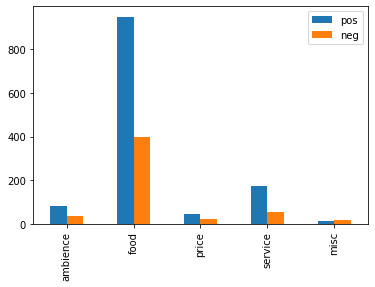

In [31]:
import matplotlib.pyplot as plt

# quick visualization
pd.DataFrame(yardbird_sentiment).T.plot(kind='bar')
plt.show()

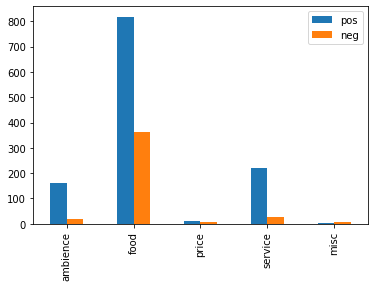

In [32]:
import matplotlib.pyplot as plt

pd.DataFrame(yardbird_sentiment).T.plot(kind='bar')
plt.show()

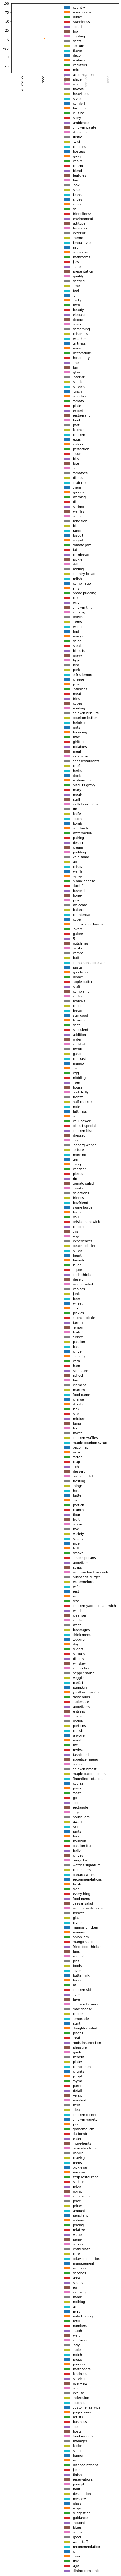

In [33]:
import matplotlib.pyplot as plt

pd.DataFrame(yardbird_dict[]).T.plot(kind='bar')
plt.show()